# Talktorial 10

# MD Simulation B - Analyze Simulation

#### CADD Seminar 2020, AG Volkamer, Charité/FU Berlin 

#### Mareike Leja

Berlin, 21.05.2020

# Learning goals

The aim of this notebook is to introduce methods for the analysis of MD Simulations. We are working with the results of the MD Simulation performed in T09 on the SARS-CoV-2 Main Protease and its inhibitor X77.
The introduced methods include animated visualization, RMSD calculation and hydrogenbond analysis.

## Theory

* MD Simulations in the drug discovery process
* Analyzing MD Simulations
    * RMSD
    * Hydrogen Bonds Analysis

## Practical

* Load the MD Simulation
* Visualize the Simulation with NGL View
* Analysis of the MD Simulation
    * Plot RMSD of Protein and Ligand
    * Plot Hydrogen Bond Distances between Protein and Ligand


# References

Theoretical Background:

* Molecular Dynamics:
    * __[Role of Molecular Dynamics and Related Methods in Drug Discovery](https://pubmed.ncbi.nlm.nih.gov/26807648/)__
    * __[Force Fields](https://pubs.acs.org/doi/10.1021/acs.jcim.8b00042)__
* RMSD
    * __[Wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation)__
* Hydrogen - Bonds
    * __[Optimized Hydrophobic Interactions and Hydrogen Bonding at the Target-Ligand Interface Leads the Pathways of Drug-Designing](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2922327/)__
    * __[The Role of Hydrogen-Bonds in Drug Binding](https://pubmed.ncbi.nlm.nih.gov/2726808/)__


Special Packages used:

* __[MDAnalysis](https://www.mdanalysis.org/)__
* __[NGL View](https://github.com/arose/nglview)__

# Theory

## MD Simulations in the Drug Discovery Process

During the past decade the importance of structure-based drug design was ever growing. Especially the development of better algorithms and faster architectures paved the way for Molecular Dynamics (MD) to becoming routine computational tools for drug discovery. 

The main advantage is the more accurate estimation of drug-target recognition and binding processes. An array of methods build on MD Simulations provide tool for most problems encountered during the challenging process of designing, selecting and optimizing new drug candidates.

### MD Simulations vs Static Structures

Static models also evaluate the affinity a drug candidate has to the target, but static calculations alone are not enough to to comprehensively characterize drug-target binding. The numerous interactions between ligand, target and surroundings cannot be captured solely by the enthalpy of the current equilibrium state of the system.

Forcefield-based MD Simulations on the other hand fully account for structural flexibility and entropic effects. 
They allow for modeling of induced-fit bindings and conformational selection and can even be used to run unbiased simulations with unsupervised ligand-target binding.

### Coupled Methods for Investigating Ligand Binding

While being a straightforward way of simulating drug-binding events, unbiased MD is costly. Thus it is often coupled with so-called enhanced sampling methods to accelerate the process.

One of these is the **Free energy perturbation (FEP)**, which computes the free energy difference when going from a state A to another state B.  It is used for studying binding energetics and is applied in the virtual screening of ligands during the drug discovery process. Furthermore, it is employed in lead optimization being especially good at predicting small modification, that will boost the ligand-binding affinity for the target. One successful example for this optimization is the design of the most potent non-nucleoside inhibitors of HIV-1 reverse transcriptase.

Another technique for free-energy calculations is **Umbrella sampling (US)**. US enforces sampling along a collective variable (CV) by performing staged simulations with an energetic bias. The bias usually takes the form of a harmonic potential, hence the term "umbrella". The goal is to sample high-energy regions along the CV.
The use in drug design is limited by the high computational cost.

**Steered MD (SMD)**  on the other hand follows a different approach: it applies external forces to the system. Those forces are time-dependent and facilitate the unbinding of the ligand from the target.
The SMD calculates the final force exerted on the system. The unbinding force profile can then be used to improve docking and discriminate active and inactive binders.

Lastly, a broad family of enhanced sampling techniques is cumulated in the term of **Metadynamics-Based Methods**. Those aim to explore the free-energy landscapes of rare events. For this purpose a set of CVs is used, that approximate the true reaction coordinate of the event.
Metdaynamics demonstrates a high ability to characterize binding and unbinding paths, to treat conformation flexibility,and to compute free-energy profiles and thus is able to accurately compute the entire physical path of protein−ligand binding and/or unbinding. Nevertheless, for calculations of relative free energy concerning a set of compounds in binding poses other methods like FEP are often more efficient.


## Analyzing MD Simulations

An MD Simulation is defined by a list of atoms and a file with trajectories, which describe the movement of the atoms for up to a few milliseconds. This allows for exploration of different aspects. 

### Visualization

The MD Simulation can be used to create an animated 3D model of the molecules. These allow for observation of conformational changes, fluctuations and binding processes with the bare eye.

![Model](images/model.gif)
Fig. 1: Visualization of MD Simulation of AdK, [NGL View Example](https://github.com/arose/nglview/blob/master/examples/mdanalysis.md)

### RMSD

RMSD stands for Root-mean-square deviation of atomic positions and is a measure of the average distance between atoms. Particularly, the distance between two sets of coordinates is calculated. 
One use of RMSD Plots is to depict the relative movement of whole molecules or its domains during folding or docking processes. 
During the process the coordinates of the moving molecule are compared to the starting positions.
RMSD can also be used to compare computed docking configurations to known (i.e. crystallographic) binding poses to validate the docking protocol.

For two, usually superimposed, sets of coordinates v and w with n atoms the RMSD is defined as follows:

$$RMSD(v,w) = \frac{1}{n} \sum_{i=1}^n \|v_i - w_i\|²$$

For random movements of stable structures the root-mean-square fluctuation (RMSF) is used instead.


### Hydrogen Bond Analysis

Non-covalent hydrogen bonds are key-players in the bonding and stabilization of proteins and ligands. 
Analysis of hydrogen bonds in the computed binding can thus give valuable information about the stability of the structure.
The strength of H-Bonds is determined by the angle and the distance between the donor and acceptor atoms. 
A small distance and an angle close to 180° are signs for a strong bond, while bigger distances and smaller angles point towards a weaker bond.
![H-Bonds](images/CADD_Hbonds.png)
Fig. 2: Hydrogen Bond Strength, *Mareike Leja, CADD Seminar 2020*

For hydrogen bond detection in computational analysis, geometric criteria define which interactions are recorded as bonds: The distance between acceptor and hydrogen has to be less than or equal to a distance threshold and 
the angle between donor-hydrogen-acceptor has to be greater than or equal to an angle threshold.
For example, the Python Package __[MD Analysis](https://www.mdanalysis.org/docs/documentation_pages/analysis/hbond_analysis.html)__, which we will use for analysis, sets the default maximum distance at 3Å and the minimum angle at 120°. 

# Practical


In the following we will load a MD Simulation and analyze the ligand binding process. 
The MD Simulation we analyze was done in Project T09 with a SARS-CoV-2 main protease and inhibitor X77.
We will visualize the simulation and then perform a RMSD calculation and hydrogen bond analysis. 

Required Packages: 
* MDAnalysis v.1.0.0
* NGLView
* Pandas
* Matplotlib
* Numpy

The data can be downloaded from https://zenodo.org/record/3910753.

Before we start we have to import the needed modules.

In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import hbonds
from MDAnalysis.analysis.hbonds import WaterBridgeAnalysis as WBA
from MDAnalysis.analysis import diffusionmap, align
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
import nglview as nv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/home/mika/miniconda3/envs/T10_ML/lib/python3.6/site-packages/MDAnalysis/analysis/hbonds/hbond_analysis.py:346: DeprecationWarning: This module is deprecated as of MDAnalysis version 1.0.It will be removed in MDAnalysis version 2.0Please use MDAnalysis.analysis.hydrogenbonds.hbond_analysis instead.
  category=DeprecationWarning


_ColormakerRegistry()

We are aware of the deprecation warning. Unfortunately, the new modules are not compatible with our data, while the current one is working well. In the future these parts might get updated. Meanwhile, MDAnalysis should not be updated to v 2.0.

## Load and Visualize the Molecule

As the first step we load the topology and the trajectory file to create a universe representing the simulation.

In [2]:
u_old = mda.Universe("data/old_md/MD_system.pdb", "data/old_md/trajectory.dcd")
print(u_old)

<Universe with 64451 atoms>


When we have the universe we can visualize it as a whole, including the animation.


In [16]:
view = nv.show_mdanalysis(u_old)
view

NGLWidget(max_frame=99)

In [17]:
u = mda.Universe("data/MD_system.pdb", "data/trajectory.dcd")
view = nv.show_mdanalysis(u)
#view.add_representation('licorice', selection="water")
view

NGLWidget(max_frame=99)

## RMSD of Protein and Ligand

Protein and ligand are clearly extinguishable in the animation. Both undergo some conformational changes during the binding process.
In this part we will evaluate the relative movement using the RMSD.
The MD Analysis framework allows for selection of atom groups with strings and has some built-in default strings as well, for example "protein", which selects all residues usually found in proteins.
The ligand is best selected by its distinct residue name. In this case we know it is the inhibitor X77, but we could also find the name from either inspecting the topology file or hovering a ligand atom in the animation above. The atoms of our ligand are identified by the residue name "X77".

### RMSD over time

For plotting the RMSD easily we write a function that does the RMSD calculation for selected atomgroups from the universe. It returns a plotable Pandas Dataframe.

In [5]:
def rmsd_for_atomgroups(universe, selection1, selection2=None):
    """ Calulate the RMSD for selected atomgroups.

    Parameters
    ----------
    universe : MDAnalysis.core.universe.Universe
    selection1: str
        selection string for main atomgroup
    selection2: list of str, optional
        selection strings for secondary atomgroups

    Returns
    -------
    rmsd_df : pandas.core.frame.DataFrame
        DataFrame containing RMSD of the selections over time

    """
    universe.trajectory[0]
    ref = universe
    rmsd_analysis = rms.RMSD(universe, ref,
                             select=selection1, groupselections=selection2)
    rmsd_analysis.run()
    columns = [selection1, *selection2] if selection2 else [selection1]
    rmsd_df = pd.DataFrame(rmsd_analysis.rmsd[:, 2:],
                           columns=columns)
    rmsd_df.index.name = "frame"
    return rmsd_df

Run the function to with selections for the whole protein, the protein backbone atoms and the ligand (residuename X77) to calculate the RMSD for the molecules during the interaction. During the calculation the molecule will be superimposed to the first frame along the backbone of the protein.

In [6]:
rmsd = rmsd_for_atomgroups(u, "backbone", ["protein", "resname X77"])
rmsd.head()

,backbone,protein,resname X77
frame,,,
0,0.000001,9.343699e-08,0.000000
1,0.751664,1.017595e+00,1.433068
2,0.790456,1.105963e+00,1.953530
3,0.776458,1.166807e+00,1.683752
4,0.854742,1.212292e+00,1.546852


If needed, we can change the column names to be more concise. 
Then we plot the results.

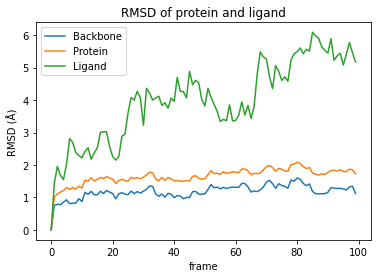

In [7]:
rmsd.columns = ["Backbone", "Protein", "Ligand"]
rmsd.plot(title="RMSD of protein and ligand")
plt.ylabel("RMSD (Å)");

From the plot we can see that the ligand moves around more. The distance to the original position first gets bigger and then shrinks again. There might be some directional movement involved.
The protein however is superimposed along the backbone and the RMSD shows slight conformational changes during the reaction. The sidechains included in the whole protein lead to more movement when compared to the protein backbone.

### RMSD between frames

The plot before showed the distance at the given time compared to the initial state.
Now we calculate the differences between the frames and visualize them in a heatmap.

In [8]:
def RMSD_dist_frames(u, selection_string):
    """ Calculate the distance between frames using RMSD.

    Parameters
    ----------
    universe : MDAnalysis.core.universe.Universe
    selection1: str
        selection string for the atomgroup to be investigated

    Returns
    -------
    array
        distance values

    """
    align.AlignTraj(u, u, select=selection_string,
                    in_memory=True).run()
    matrix = diffusionmap.DistanceMatrix(u, select=selection_string).run()

    return matrix.dist_matrix

First, we calculate the distance matrices for protein and ligand using the function above.
Then we plot them side by side as heatmaps.

In [9]:
dist_matrix_p = RMSD_dist_frames(u, "protein")
dist_matrix_np = RMSD_dist_frames(u, "resname X77")

In order to achieve comparable heatmaps it is important to set minimal and maximal values to the same values in both plots. We set the minimal value to 0 and derive the upper bound from the distance matrices.

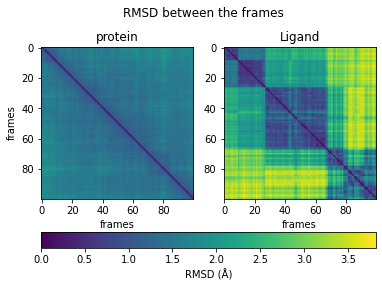

In [10]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("RMSD between the frames")
max_dist = max(np.amax(dist_matrix_np), np.amax(dist_matrix_p))
img1 = ax[0].imshow(dist_matrix_p, cmap="viridis", vmin=0, vmax=max_dist)
ax[0].title.set_text("protein")
ax[0].set_xlabel("frames")
ax[0].set_ylabel("frames")
img2 = ax[1].imshow(dist_matrix_np, cmap="viridis", vmin=0, vmax=max_dist)
ax[1].title.set_text("Ligand")
ax[1].set_xlabel("frames")
fig.colorbar(img1, ax=ax, orientation="horizontal", fraction=.1, label="RMSD (Å)")

From the heatmaps we can conclude that the protein moves constantly and evenly between the states. The ligand, however, reaches similar conformations repeatedly. The conformation around frame 20 and between frames 60 - 80 are the most different from the others. This corresponds to the peaks visible in the graph above.
The conformation at frame 20 is not similar to the conformation at frames 60 - 80.

## Hydrogen Bond analysis

Now we will look at the interaction between protein and ligand. Therefore we want to analyze the hydrogen bonds that form during the process.

MD Analysis is able to guess possible acceptors and donors for proteins but not the ligand.
Thus we have to determine them manually. To do this we visualize the ligand and note down any O, N or S atoms that may serve as donor or acceptor. We can get their respective ID by hovering over the atom in the image.

In [11]:
ligand = u.select_atoms("resname X77")
nv.show_mdanalysis(ligand)

NGLWidget(max_frame=99)

After this we run the the H-Bond Analysis adding our determined donor and acceptor atoms to the list.

In [12]:
h = hbonds.HydrogenBondAnalysis(u, "resname X77", "protein",
                                donors=["N32", "N06"],
                                acceptors=["O13", "O01", "N18", "N34", "N03"],
                                distance=3.0, angle=120.0)
h.run()

/home/mika/miniconda3/envs/T10_ML/lib/python3.6/site-packages/MDAnalysis/analysis/hbonds/hbond_analysis.py:580: DeprecationWarning: This class is deprecated as of MDAnalysis version 1.0 and will be removed in version 2.0.Please use MDAnalysis.analysis.hydrogenbonds.hbond_analysis.HydrogenBondAnalysis instead.
  category=DeprecationWarning
/home/mika/miniconda3/envs/T10_ML/lib/python3.6/site-packages/MDAnalysis/analysis/hbonds/hbond_analysis.py:673: SelectionWarning: No donors found in selection 1. You might have to specify a custom 'donors' keyword. Selection will update so continuing with fingers crossed.
  warnings.warn(errmsg, category=SelectionWarning)
/home/mika/miniconda3/envs/T10_ML/lib/python3.6/site-packages/MDAnalysis/analysis/hbonds/hbond_analysis.py:673: SelectionWarning: No acceptors found in selection 1. You might have to specify a custom 'acceptors' keyword. Selection will update so continuing with fingers crossed.
  warnings.warn(errmsg, category=SelectionWarning)


In [13]:
u.select_atoms("resname X77 and (name O or name N)")

<AtomGroup with 0 atoms>

In [14]:
h_new = HBA(universe=u,
            donors_sel="not resname X77 and not resname HOH and (name O or name N)",
            hydrogens_sel="not resname X77 and not resname HOH and name H",
            acceptors_sel="resname X77 and (name O or name N)",
            d_a_cutoff=3.0, d_h_a_angle_cutoff=120.0)

In [15]:
h_new.guess_donors()

NoDataError: This Universe does not contain charge information

In [ ]:
h_new.run()

In [ ]:
h_new.hbonds

Let's see how many bonds we get.

In [ ]:
time_count = h.count_by_time()
h_df = pd.DataFrame.from_records(time_count)
ax = h_df.plot(y="count", title="Amount of Hydrogenbonds over time", legend=False)
ax.set_xlabel("frame")
ax.set_ylabel("count")

In [ ]:
time_count_new = h_new.count_by_time()

In [ ]:
counts = pd.DataFrame(data=time_count_new, index=h_new.times)

In [ ]:
ax = counts.plot(title="Amount of Hydrogenbonds over time", legend=False)
ax.set_xlabel("frame")
ax.set_ylabel("count")

For more detail on the bonds we generate a readable table from the analysis.

In [ ]:
h.generate_table()
h_df = pd.DataFrame.from_records(h.table)
h_df.head()

In [ ]:
h_df.tail()

In the dataframe distance and angle are denoted for each bond at each timestep.
From this we can calculate the average angles and distances over time. While the hydrogen bond analysis automatically estimates continuous timesteps, we will stick to representation in frames as no time measurement is given in our trajectories.
First, select the unique timepoints, then get distances and angles at that time and take the mean. 
For easier plotting, we combined the data into a Pandas DataFrame.

In [ ]:
timesteps = h_df["time"].unique()
timesteps.sort()
avg_dist = []
avg_angle = []
for t in timesteps:
    df_time = h_df.loc[h_df["time"] == t]
    avg_dist.append(df_time.distance.mean())
    avg_angle.append(df_time.angle.mean())
average_df = pd.DataFrame({"distance": avg_dist, "angle": avg_angle},
                          index=range(0, len(timesteps)))

In [ ]:
fig = plt.figure()
distance = average_df.distance.plot(title="Average distances and angles")
distance.set_ylabel("distance (Å)")
distance.set_xlabel("frame")
angle = average_df.angle.plot(secondary_y=True)
angle.set_ylabel("angle (°)")
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=distance.transAxes)
plt.show()

We can also compare the distribution of angles and distances at the beginning and end.
To do this we extract the data for the timepoints...

In [ ]:
start = h_df.loc[h_df["time"] == h_df["time"].min()]
end = h_df.loc[h_df["time"] == h_df["time"].max()]

...and plot into histogramms.

In [ ]:
bins = np.linspace(120, 180, 7)
fig, ax = plt.subplots(1, 2)
fig.suptitle("Hydrogenbond statistics")
ax[0].hist([start["angle"], end["angle"]], bins, label=["Start", "End"], alpha=0.5)
ax[0].legend(loc="upper left")
ax[0].title .set_text("Angle")
ax[0].set_xlabel("angle (°)")
ax[1].hist([start["distance"], end["distance"]], label=["Start", "End"], alpha=0.5)
ax[1].legend(loc="upper right")
ax[1].title.set_text("Distance")
ax[1].set_xlabel("distance (Å)")
fig.subplots_adjust(wspace=0.6)
plt.show()

In the next step we want to look at some bonds in more detail.
We write a function that generates a plot containing details about one specific bond. The bond is characterized by its donor and acceptor atoms.

In [ ]:
def plot_hydrogen_bond_over_time(hbonds_analysis, donor_index, acceptor_index):
    """ Plot the distance and degree of a chosen hydrogen bond over time.
    Peaks in angle and dips in distance represent moments of strong binding.

    Parameters
    ----------
    hbonds_analysis : MDAnalysis.analysis.hbonds.hbond_analysis.HydrogenBondAnalysis
    donor_index : int
        Index of donor atom in MDAnalysis Universe
    acceptor_index : int
        Index of acceptor atom in MDAnalysis Universe

    Notes
    -----
    The time measurement of the Hydrogenbond Analysis is converted back to frames
    to be consistent with the trajectoy.

    """
    hbonds_analysis.generate_table()
    hbonds_analysis_df = pd.DataFrame.from_records(h.table)
    timesteps = hbonds_analysis_df["time"].unique()
    timesteps.sort()
    hbonds_analysis_df["frame"] = -1
    for i, t in enumerate(timesteps):
        hbonds_analysis_df.loc[hbonds_analysis_df["time"] == t, "frame"] = i

    bond = hbonds_analysis_df.loc[(hbonds_analysis_df["donor_index"] == donor_index) &
                                  (hbonds_analysis_df["acceptor_index"] ==
                                   acceptor_index)]

    bond.set_index("frame", inplace=True, drop=True)
    fig = plt.figure()
    distance = bond.distance.plot(title=f"H-Bond between donor {donor_index}"
                                  f" and acceptor {acceptor_index}",
                                  xlim=(0, len(timesteps)), style="o-")
    distance.set_ylabel("distance (Å)")
    distance.set_xlabel("frame")
    angle = bond.angle.plot(secondary_y=True, style="o-")
    angle.set_ylabel("angle (°)")
    angle.set_xlabel("frame")
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1),
               bbox_transform=distance.transAxes)
    plt.show()

Finally, we can run the function with bonds selected from the table we generated before. 

In [ ]:
plot_hydrogen_bond_over_time(h, 2551, 4699)

In [ ]:
plot_hydrogen_bond_over_time(h, 2220, 4697)

In these exemplary plots we can see that the first bond has lower distances and higher angles overall and is thus stronger than the second. The first one persists the entire time, while the second one gets broken several times as we can derive from missing values (points on the lines).

### Water Bridge Analysis

In [ ]:
w = hbonds.WaterBridgeAnalysis(u, "resname X77", "protein")
w.run()

## Summary

There are various ways to analyze MD Simulations and in this notebook we explored just a small spectrum. Nevertheless, we gained valuable insights into the binding process happening.

Some methods are more straightforward, like the visualization of the molecule, while others require more finesse.
Especially the hydrogen bond analysis is yet dependent on manual input and tweaking, but with further advancements in the field we can expect the frameworks to become more and more refined.
In the end, all approaches contributed a piece towards understanding the complex interactions captured with the MD simulation.

